# Бекназаров Назар 

# RiboSeq

In [145]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv', index_col=0, sep="\t")
df = df.dropna(0)

In [7]:
df.head()

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,0,...,218,457,0,0,200,889,0,0,161,857.0
ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,325,...,92,170,109,357,60,244,141,173,56,83.0
ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,130,...,127,176,67,176,55,261,64,100,68,176.0
ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,44,...,124,437,7,167,34,201,6,61,9,58.0
ENSG00000000938.12,FGR,0,6,19,9,14,13,61,24,15,...,94,13,3,9,42,26,7,10,26,57.0


# Задание 1

### Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не нормированные каунты.

Будем смотреть корреляцию Спирмена, так как данные не нормированны, а корреляция Спирмена устойчива к ненормированности данных. Также в пользу Спирмена может говорить специфика задачи, нам важнее гарантировать ранговое соотношения экспрессии, в выявлении которой как раз подходит коэф. Спирмена.

In [57]:
genes_types = list({i[:-4]for i in df.columns[1:]})
genes = df['geneSymbol'].values

In [51]:
rna_exp = df[[f"{gene_type}-RNA" for gene_type in genes_types]].values
rpf_exp = df[[f"{gene_type}-RPF" for gene_type in genes_types]].values

In [54]:
correlations = [stats.spearmanr(rna, rpf)[0] for rna, rpf in zip(rna_exp, rpf_exp)]

### Постройте гистограмму распределения этих коэффициентов корреляции. Для каких генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это объяснить?

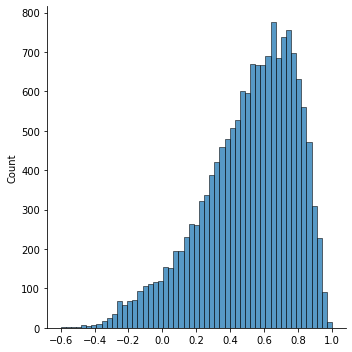

In [55]:
sns.displot(correlations)

Можно заметить, что коэфициенты достаточно высокие 

In [63]:
genes[np.argmax(np.nan_to_num(correlations))]

'FAM46D'

In [64]:
genes[np.argmin(np.nan_to_num(correlations))]

'LAT'

In [73]:
df[df.geneSymbol == "FAM46D"].T

geneID,ENSG00000174016.11
geneSymbol,FAM46D
LC001-normal-RPF,0
LC001-tumor-RPF,0
LC001-normal-RNA,0
LC001-tumor-RNA,0
LC033-normal-RPF,0
LC033-tumor-RPF,0
LC033-normal-RNA,0
LC033-tumor-RNA,0
LC034-normal-RPF,0


Для FAM46D коэф. самый высокий, для LAT самый низкий. Но посмотрев на FAM46D видим что это связано просто с большим кол-вом нулей.

In [75]:
genes[np.argsort(np.nan_to_num(correlations))][-5:]

array(['CYP7A1', 'LGALS4', 'PRG4', 'FAM46D', 'RFPL4B'], dtype=object)

In [77]:
df[df.geneSymbol == "PRG4"].T

geneID,ENSG00000116690.12
geneSymbol,PRG4
LC001-normal-RPF,4540
LC001-tumor-RPF,1016
LC001-normal-RNA,1538
LC001-tumor-RNA,252
LC033-normal-RPF,3185
LC033-tumor-RPF,762
LC033-normal-RNA,787
LC033-tumor-RNA,162
LC034-normal-RPF,11711


Более интересным оказался PRG4. До конца не ясно почему именно у этого гена корреляция по методам оказалась самой большой. Скорее всего по случайным причинам.

In [78]:
genes[np.argsort(np.nan_to_num(correlations))][:5]

array(['LAT', 'RPH3A', 'C14orf28', 'SOX8', 'REM2'], dtype=object)

In [81]:
df[df.geneSymbol == "LAT"].T

geneID,ENSG00000213658.10
geneSymbol,LAT
LC001-normal-RPF,2
LC001-tumor-RPF,15
LC001-normal-RNA,2
LC001-tumor-RNA,0
LC033-normal-RPF,0
LC033-tumor-RPF,2
LC033-normal-RNA,0
LC033-tumor-RNA,0
LC034-normal-RPF,2


Посмотрев на ген с самой маленькой корреляцией, ожидается увидеть ген с большой разницей в экспрессии и трансляции. Видим по данным, что он сильно перетранслирован в тканях опухолей. Этот белок связан с индукцией апоптоза клетки, что ожидаемо для раковых опухолей.

### Найдите дифференциально экспрессированные гены по RNA-Seq между нормой и опухолью. Для этого можете использовать DESeq2 или edgeR (для DESeq есть обёртка на Python). Постройте volcano plot. То же самое сделайте и для Ribo-Seq эксперимента. Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом? Выводы подкрепите графиками

In [86]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri, Formula
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter

In [151]:
rna_exp = df[[col for col in df.columns if col.endswith("-RNA")]]


In [152]:
types = []

for col in rna_exp.columns:
    if "normal" in col:
        types.append("normal")
    elif "tumor" in col:
        types.append("tumor")
        
meta = pd.DataFrame({"tissue": types, "id": rna_exp.columns}) 

In [153]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_meta = ro.conversion.py2rpy(meta)
    r_rna_exp = ro.conversion.py2rpy(rna_exp)

In [118]:
%load_ext rpy2.ipython

In [120]:
%Rpush r_meta
%Rpush r_rna_exp

In [121]:
%%R
library(DESeq2)
library(ggplot2)
rna_res = results(DESeq(DESeqDataSetFromMatrix(countData=r_rna_exp, colData=r_meta, design=~tissue)))
head(rna_res)

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 934 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



log2 fold change (MLE): tissue tumor vs normal 
Wald test p-value: tissue tumor vs normal 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat     pvalue
                   <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000000003.14  406.2793       1.016935  0.396481  2.564905 0.01032041
ENSG00000000419.12  105.8720       0.636652  0.319137  1.994917 0.04605189
ENSG00000000457.13  104.4803       0.305491  0.238214  1.282424 0.19969384
ENSG00000000460.16   62.8126       1.553418  0.546450  2.842747 0.00447265
ENSG00000000938.12   43.1990      -1.106184  0.371962 -2.973916 0.00294026
ENSG00000000971.15 4589.9111      -0.269086  0.419721 -0.641108 0.52145284
                        padj
                   <numeric>
ENSG00000000003.14 0.0359947
ENSG00000000419.12 0.1136152
ENSG00000000457.13 0.3364840
ENSG00000000460.16 0.0187410
ENSG00000000938.12 0.0135043
ENSG00000000971.15 0.6614793


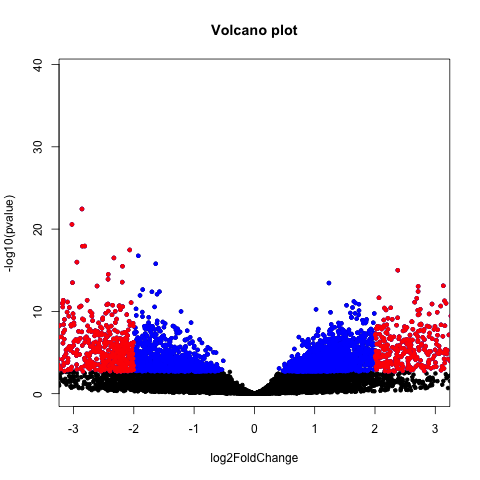

In [140]:
%%R

with(rna_res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

with(subset(rna_res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(rna_res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [143]:
from rpy2.robjects.robject import RSlots
from rpy2.rinterface import NULLType
pandas2ri.activate()

def rpy2py_data_frame(obj) -> pd.DataFrame:
    with localconverter(ro.default_converter + pandas2ri.converter):
        slots = RSlots(obj)
        columns = dict(slots["listData"].items())
        rownames = slots["rownames"]
        if isinstance(rownames, NULLType):
            rownames = pd.RangeIndex(slots["nrows"][0])

    return pd.DataFrame(columns, index=rownames)

%Rpull rna_res
rna_res_data = rpy2py_data_frame(rna_res)

In [156]:
rpf_exp = df[[col for col in df.columns if col.endswith("-RPF")]]

In [157]:
types = []

for col in rpf_exp.columns:
    if "normal" in col:
        types.append("normal")
    elif "tumor" in col:
        types.append("tumor")
        
meta = pd.DataFrame({"tissue": types, "id": rpf_exp.columns}) 

In [158]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_meta = ro.conversion.py2rpy(meta)
    r_rpf_exp = ro.conversion.py2rpy(rpf_exp)

In [159]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [160]:
%Rpush r_meta
%Rpush r_rpf_exp

In [161]:
%%R
library(DESeq2)
library(ggplot2)
rpf_res = results(DESeq(DESeqDataSetFromMatrix(countData=r_rpf_exp, colData=r_meta, design=~tissue)))
head(rpf_res)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 698 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



log2 fold change (MLE): tissue tumor vs normal 
Wald test p-value: tissue tumor vs normal 
DataFrame with 6 rows and 6 columns
                     baseMean log2FoldChange     lfcSE      stat     pvalue
                    <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000000003.14     0.0000             NA        NA        NA         NA
ENSG00000000419.12   187.3474     -0.1125226  0.207801 -0.541492 0.58816854
ENSG00000000457.13    88.7786      0.0538923  0.245299  0.219700 0.82610455
ENSG00000000460.16    42.1875      1.3664474  0.480997  2.840867 0.00449911
ENSG00000000938.12    10.2969     -0.2318031  0.716654 -0.323452 0.74635301
ENSG00000000971.15 23903.4760     -1.2108586  0.423329 -2.860325 0.00423207
                        padj
                   <numeric>
ENSG00000000003.14        NA
ENSG00000000419.12 0.7480456
ENSG00000000457.13 0.9061894
ENSG00000000460.16 0.0301336
ENSG00000000938.12 0.8576090
ENSG00000000971.15 0.0287577


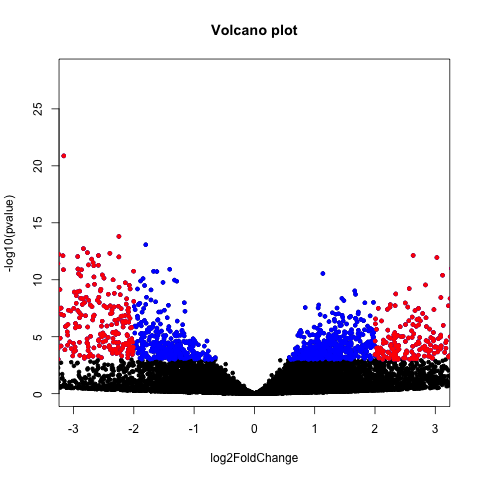

In [162]:
%%R

with(rpf_res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

with(subset(rpf_res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(rpf_res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [163]:
%Rpull rpf_res
rpf_res_data = rpy2py_data_frame(rpf_res)

In [166]:
rna_res_data[rna_res_data.padj < 0.01].index

Index(['ENSG00000001036.13', 'ENSG00000001167.14', 'ENSG00000001561.6',
       'ENSG00000001617.11', 'ENSG00000001629.9', 'ENSG00000003402.19',
       'ENSG00000003989.16', 'ENSG00000004468.12', 'ENSG00000004700.15',
       'ENSG00000004766.15',
       ...
       'ENSG00000278311.4', 'ENSG00000278463.1', 'ENSG00000278540.4',
       'ENSG00000278637.1', 'ENSG00000278705.1', 'ENSG00000278828.1',
       'ENSG00000278845.4', 'ENSG00000279937.1', 'ENSG00000280175.1',
       'ENSG00000282988.1'],
      dtype='object', length=3166)

In [167]:
rpf_res_data[rpf_res_data.padj < 0.01].index

Index(['ENSG00000001036.13', 'ENSG00000002549.12', 'ENSG00000002919.14',
       'ENSG00000003989.16', 'ENSG00000004799.7', 'ENSG00000004975.11',
       'ENSG00000005001.9', 'ENSG00000005156.11', 'ENSG00000005187.11',
       'ENSG00000005421.8',
       ...
       'ENSG00000276903.1', 'ENSG00000277075.2', 'ENSG00000277157.1',
       'ENSG00000277224.2', 'ENSG00000277893.1', 'ENSG00000278272.1',
       'ENSG00000278463.1', 'ENSG00000278637.1', 'ENSG00000278705.1',
       'ENSG00000278828.1'],
      dtype='object', length=1355)

Видим что в Riboseq по сравнению с RNASeq в 2.5 раза меньше значимых генов.

In [169]:
rna = set(rna_res_data[rna_res_data.padj < 0.01].index)
ribo = set(rpf_res_data[rpf_res_data.padj < 0.01].index)

In [170]:
len(rna & ribo)

886

In [171]:
rna - ribo

{'ENSG00000163517.14',
 'ENSG00000163002.12',
 'ENSG00000175643.8',
 'ENSG00000144895.11',
 'ENSG00000145741.15',
 'ENSG00000104331.8',
 'ENSG00000065717.14',
 'ENSG00000139914.6',
 'ENSG00000167604.13',
 'ENSG00000196154.11',
 'ENSG00000141378.14',
 'ENSG00000165490.12',
 'ENSG00000023287.12',
 'ENSG00000146856.14',
 'ENSG00000151239.13',
 'ENSG00000119669.4',
 'ENSG00000167723.14',
 'ENSG00000130813.17',
 'ENSG00000139636.15',
 'ENSG00000189159.15',
 'ENSG00000152894.14',
 'ENSG00000198010.11',
 'ENSG00000172465.13',
 'ENSG00000093072.15',
 'ENSG00000154447.14',
 'ENSG00000104870.12',
 'ENSG00000184162.14',
 'ENSG00000178177.14',
 'ENSG00000156171.14',
 'ENSG00000167851.13',
 'ENSG00000156787.16',
 'ENSG00000117862.11',
 'ENSG00000153879.8',
 'ENSG00000123080.10',
 'ENSG00000100462.15',
 'ENSG00000139734.17',
 'ENSG00000112137.16',
 'ENSG00000274286.1',
 'ENSG00000133392.16',
 'ENSG00000196504.15',
 'ENSG00000149582.15',
 'ENSG00000137177.18',
 'ENSG00000088881.20',
 'ENSG00000147679

In [172]:
ribo - rna

{'ENSG00000002549.12',
 'ENSG00000002919.14',
 'ENSG00000004799.7',
 'ENSG00000004975.11',
 'ENSG00000005421.8',
 'ENSG00000007171.16',
 'ENSG00000008311.14',
 'ENSG00000008735.13',
 'ENSG00000008838.17',
 'ENSG00000009765.14',
 'ENSG00000010244.16',
 'ENSG00000010292.12',
 'ENSG00000011007.12',
 'ENSG00000013306.15',
 'ENSG00000013441.15',
 'ENSG00000013810.18',
 'ENSG00000014914.19',
 'ENSG00000023330.14',
 'ENSG00000023516.8',
 'ENSG00000025423.11',
 'ENSG00000033011.11',
 'ENSG00000044090.8',
 'ENSG00000047346.12',
 'ENSG00000051341.13',
 'ENSG00000052749.13',
 'ENSG00000055483.19',
 'ENSG00000057935.13',
 'ENSG00000059769.19',
 'ENSG00000060762.18',
 'ENSG00000061337.15',
 'ENSG00000062096.14',
 'ENSG00000065361.14',
 'ENSG00000068323.16',
 'ENSG00000069431.10',
 'ENSG00000069667.15',
 'ENSG00000070669.16',
 'ENSG00000070814.17',
 'ENSG00000070882.12',
 'ENSG00000071462.11',
 'ENSG00000071859.14',
 'ENSG00000072080.10',
 'ENSG00000073712.14',
 'ENSG00000075239.13',
 'ENSG000000757

Посмотрим на гены со значимой диф экспрессией в разных вариантахё


In [266]:
gene = list(rna & ribo)[1]
line = df.loc[[gene]]

In [267]:
gene

'ENSG00000143761.13'

In [268]:
normal_rpf = [line[i].values[0] for i in line.columns if 'normal-RPF' in i]
normal_rna = [line[i].values[0] for i in line.columns if 'normal-RNA' in i]
tumor_rpf = [line[i].values[0] for i in line.columns if 'tumor-RPF' in i]
tumor_rna = [line[i].values[0] for i in line.columns if 'tumor-RNA' in i]

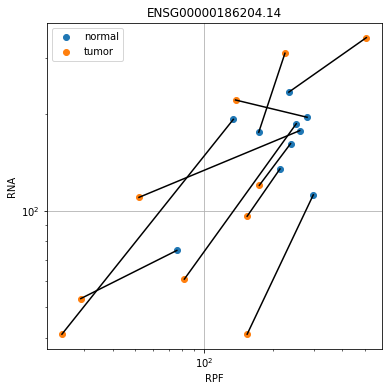

In [275]:
plt.figure(figsize=(6, 6))
plt.xlabel('RPF')
plt.ylabel('RNA')
plt.title(gene)
plt.xscale('log')
plt.yscale('log')
for i in range(len(normal_rpf)):
    plt.plot([normal_rpf[i], tumor_rpf[i]], [normal_rna[i], tumor_rna[i]], c='black')

plt.scatter(normal_rpf, normal_rna, label='normal')
plt.scatter(tumor_rpf, tumor_rna, label='tumor')
plt.legend()
plt.grid()

По данному графику видим, что экспрессия изменилась и в RNA и в RPF.
Этот ген отвечает за внутреннию машинерию клетки, его перепредставленность в раковых клетках ожидаема, так как в них идет множ-во процессов деления.

In [261]:
gene = list(rna - ribo)[0]
line = df.loc[[gene]]

In [264]:
gene

'ENSG00000163517.14'

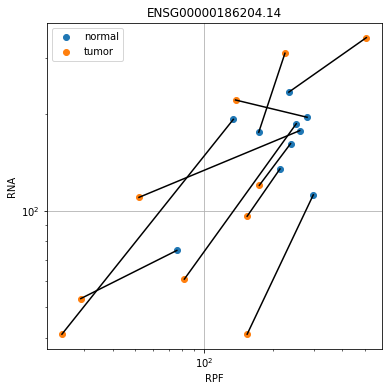

In [274]:
normal_rpf = [line[i].values[0] for i in line.columns if 'normal-RPF' in i]
normal_rna = [line[i].values[0] for i in line.columns if 'normal-RNA' in i]
tumor_rpf = [line[i].values[0] for i in line.columns if 'tumor-RPF' in i]
tumor_rna = [line[i].values[0] for i in line.columns if 'tumor-RNA' in i]

plt.figure(figsize=(6, 6))
plt.xlabel('RPF')
plt.ylabel('RNA')
plt.title(gene)
plt.xscale('log')
plt.yscale('log')
for i in range(len(normal_rpf)):
    plt.plot([normal_rpf[i], tumor_rpf[i]], [normal_rna[i], tumor_rna[i]], c='black')

plt.scatter(normal_rpf, normal_rna, label='normal')
plt.scatter(tumor_rpf, tumor_rna, label='tumor')
plt.legend()
plt.grid()

На данном графике по RPF не очевидные изменения, в отличие от RNA. Этот белок регулирует транскрипцию, можно предположить, что перепредставленность его мРНК как-то может влиять на его уровень трансляции.

In [270]:
gene = list(ribo - rna)[0]
line = df.loc[[gene]]

In [271]:
gene

'ENSG00000186204.14'

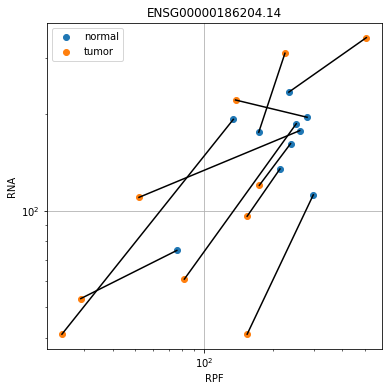

In [273]:
normal_rpf = [line[i].values[0] for i in line.columns if 'normal-RPF' in i]
normal_rna = [line[i].values[0] for i in line.columns if 'normal-RNA' in i]
tumor_rpf = [line[i].values[0] for i in line.columns if 'tumor-RPF' in i]
tumor_rna = [line[i].values[0] for i in line.columns if 'tumor-RNA' in i]

plt.figure(figsize=(6, 6))
plt.xlabel('RPF')
plt.ylabel('RNA')
plt.title(gene)
plt.xscale('log')
plt.yscale('log')
for i in range(len(normal_rpf)):
    plt.plot([normal_rpf[i], tumor_rpf[i]], [normal_rna[i], tumor_rna[i]], c='black')

plt.scatter(normal_rpf, normal_rna, label='normal')
plt.scatter(tumor_rpf, tumor_rna, label='tumor')
plt.legend()
plt.grid()

Здесть же наоборот. Этот ген связан с поглощением питательных веществ. Возможно неочевидные по RNA результаты могут говорить о разном времени проведенных анализов.

# Задание 2

### Присутствует ли в покрытии генома неравномерность? Рассмотрите неравномерность покрытия на примере любого выбранного вами гена. Что вы можете сказать про эту неравномерность? Присутствует ли там периодичность в три нуклеотида? А если взять среднее по большому количеству генов (взяв за точку отсчёта старт-кодон)? Выводы проиллюстрируйте графиками

In [449]:
from BCBio import GFF
gff = list(GFF.parse(open('sequence.gff3')))

In [450]:
genes = {"f":[], "b":[]}

for y in gff[0].features:
    for x in y.sub_features:
        gene_name = y.qualifiers['Name'][0]
        if x.type == 'CDS':
            genes['f' if x.location.strand == 1 
                  else 'b'].append((int(x.location.start), 
                                    int(x.location.end), 
                                    gene_name))
genes["f"].sort()
genes["b"].sort()

In [451]:
wig = []

f = open('HSE_RiboSeq_HT/02. RiboSeq_EColi_track_f.wig')
wig.extend([(int(x.split('\t')[0]), 
            int(x.split('\t')[1]), 'f') for x in f.read().split('\n')[1:-1]])
f = open('HSE_RiboSeq_HT/02. RiboSeq_EColi_track_r.wig')
wig.extend([(int(x.split('\t')[0]), 
            int(x.split('\t')[1]), 'b') for x in f.read().split('\n')[1:-1]])

In [452]:
all_genes = {i[2] for i in genes["f"] + genes["b"]}
coverage = {i:[] for i in all_genes}

In [453]:
for x in wig:
    found = bisect.bisect(genes[x[2]], (x[0], 5000000, ""))
    if found == 0:
        continue
    left, right, gene = genes[x[2]][found-1]
    if right > x[0]:
        coverage[gene].append((x[0] - left, x[1]))


### Присутствует ли в покрытии генома неравномерность?

Да очевидно присутствует неравномерность, что соответствует нашему ожиданию, так как РНК транслируется впринципе неравномерно.

### Рассмотрите неравномерность покрытия на примере любого выбранного вами гена. Что вы можете сказать про эту неравномерность? 

In [399]:
list(all_genes)[3]

'rcnB'

In [402]:
'rcnB' in [i[2] for i in genes["f"]]

True

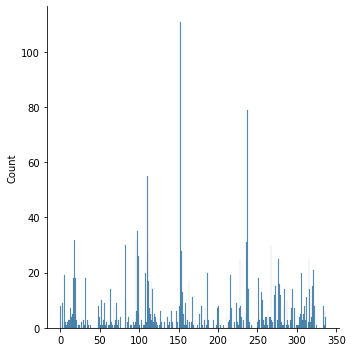

In [412]:
sns.displot([x[0] for x in coverage['rcnB'] for i in range(x[1])], bins=350)

Возьмем случайный ген, построим покрытые. Видим, что его прочтения совсем неравномерны. Кажется что отрезки низкой плотности прочтений можно объяснить экзон/интронной структурой.

### Присутствует ли там периодичность в три нуклеотида?

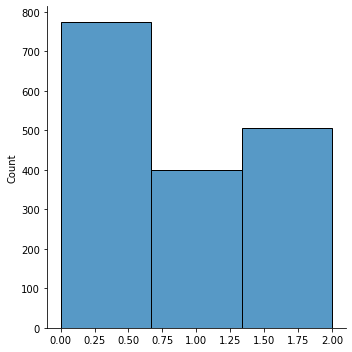

In [426]:
sns.displot([(x[0]) % 3 for x in coverage['rcnB'] for i in range(x[1])], bins=3)

Видно, что некоторая периодичность есть, что можно объяснить как раз существованием триплетов.

### А если взять среднее по большому количеству генов

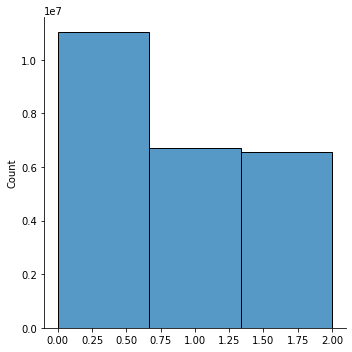

In [427]:
sns.displot([(x[0]) % 3 for gene in all_genes 
                        for x in coverage[gene] 
                        for i in range(x[1])], bins=3)

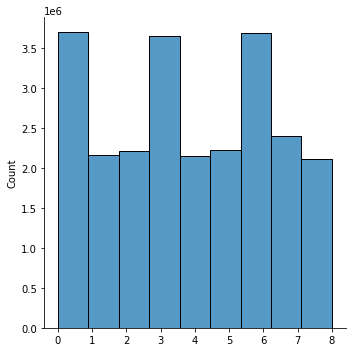

In [428]:
sns.displot([(x[0]) % 9 for gene in all_genes 
                        for x in coverage[gene] 
                        for i in range(x[1])], bins=9)

Видно что на большем кол-ве генов картине более выраженная, что на 3х что на 9ти.

In [ ]:
lens = {}
for y in gff[0].features:
    gene_name = y.qualifiers['Name'][0]
    for x in y.sub_features:
        if x.type == 'CDS':
            lens[gene_name] = x.location.end - x.location.start


In [ ]:
N = sum(x[1] for gene, cov in coverage.items() for x in cov)
RPKM = {gene: 10**9 * sum(x[1] for x in cov) / lens[gene] / N for gene, cov in coverage.items() if len(cov) > 0}

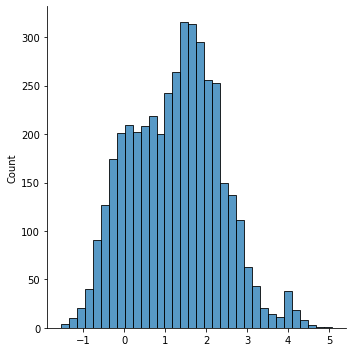

In [438]:
sns.displot([np.log10(y) for x,y in RPKM.items()])

In [439]:
tmp = sum(rpkm*N/10**6 for gene, rpkm in RPKM.items())
TPM = {gene: rpkm*N/tmp for gene, rpkm in RPKM.items()}

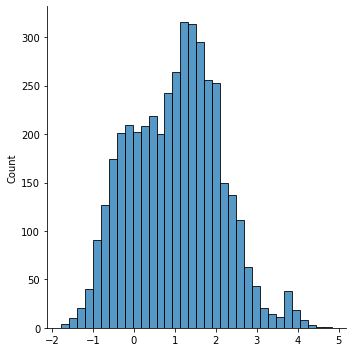

In [440]:
sns.displot([np.log10(y) for x,y in TPM.items()])

RPKM - метрика отражающая число ридов выравненных на ген, нормализаванных на глубину секвенирования и затем на общую длинну генов, тогда как в TPM кол-во ридов сначала нормализуется на длинну гена, а затем нормализуется по сумме со всеми генами и далее умножается на 1М. 

TPM уместен для сравнивания экспрессии гена относительно других в разных образцах, так как есть нормализация на сумму. RPKM подходит для сравнения экспрессий разных геном внутри одного образца, так как ожидается, что более длинные гена статистически больше экспрессируются, и для нивелирования данного эффекта подходит RPKM.